Attribute Information:

day.csv has the following fields

- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not.
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,?,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,?,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,?,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,?,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,?,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,?,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    object 
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.1+ KB


In [7]:
df['season'].describe()

count    731.000000
mean       2.496580
std        1.110807
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [8]:
df['yr'].describe()

count    731.000000
mean       0.500684
std        0.500342
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

In [9]:
df['mnth'].describe()

count     731
unique     13
top         5
freq       60
Name: mnth, dtype: object

In [10]:
df['holiday'].describe()

count    731.000000
mean       0.028728
std        0.167155
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

In [11]:
df['weekday'].describe()

count     731
unique      8
top         1
freq      104
Name: weekday, dtype: object

In [12]:
df['weathersit'].describe()

count    731.000000
mean       1.395349
std        0.544894
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

In [13]:
df['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [14]:
df['atemp'].describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64

In [15]:
df['hum'].describe()

count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: hum, dtype: float64

In [16]:
df['windspeed'].describe()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

In [17]:
df['casual'].describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: casual, dtype: float64

In [18]:
df['registered'].describe()

count     731.000000
mean     3656.172367
std      1560.256377
min        20.000000
25%      2497.000000
50%      3662.000000
75%      4776.500000
max      6946.000000
Name: registered, dtype: float64

In [19]:
df['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [20]:
df.isnull()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [22]:
df.isin(['?']).sum(axis=0)

season         0
yr             0
mnth          33
holiday        0
weekday       36
workingday    33
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

Text(0.5, 1.0, 'The frequency of each category in the dataset')

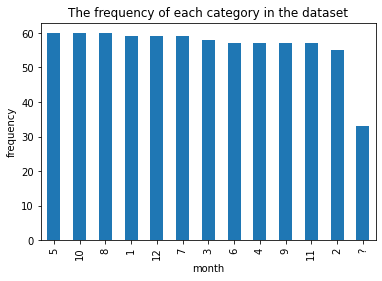

In [23]:
df['mnth'].value_counts().plot(kind='bar')
plt.xlabel('month')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

In [24]:
df["mnth"] = df["mnth"].replace(to_replace ="?", 
                 value ="5")

Text(0.5, 1.0, 'The frequency of each category in the dataset')

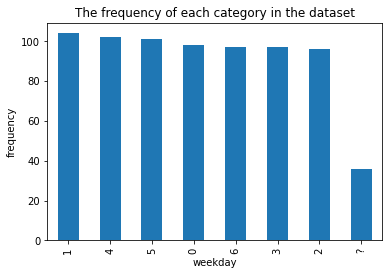

In [25]:
df['weekday'].value_counts().plot(kind='bar')
plt.xlabel('weekday')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

In [26]:
df["weekday"] = df["weekday"].replace(to_replace ="?", 
                 value ="1")

Text(0.5, 1.0, 'The frequency of each category in the dataset')

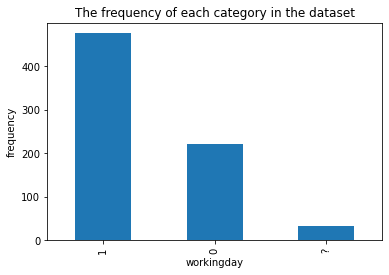

In [27]:
df['workingday'].value_counts().plot(kind='bar')
plt.xlabel('workingday')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

In [28]:
df["workingday"] = df["workingday"].replace(to_replace ="?", 
                 value ="1")

Text(0.5, 1.0, 'The frequency of each category in the dataset')

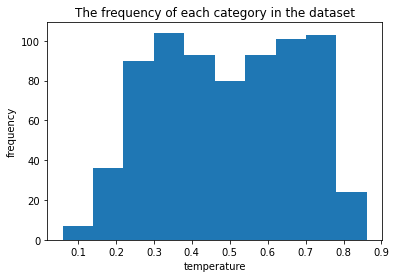

In [29]:
plt.hist(df["temp"], bins = 10)
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')


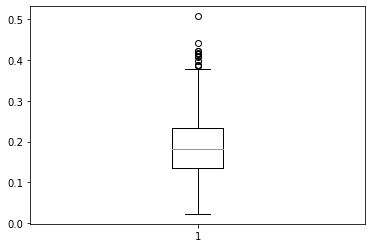

In [30]:
plt.boxplot(df["windspeed"])
plt.show()

Text(0.5, 1.0, 'The frequency of each category in the dataset')

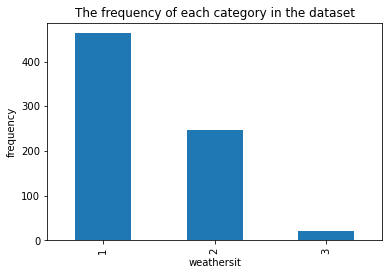

In [31]:
df['weathersit'].value_counts().plot(kind='bar')
plt.xlabel('weathersit')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

Text(0.5, 1.0, 'The frequency of each category in the dataset')

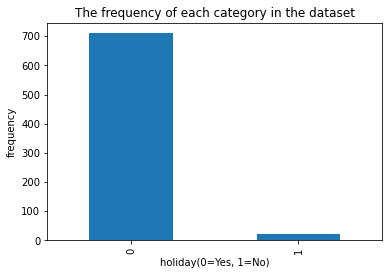

In [32]:
df['holiday'].value_counts().plot(kind='bar')
plt.xlabel('holiday(0=Yes, 1=No)')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

Text(0, 0.5, 'Number of rentals')

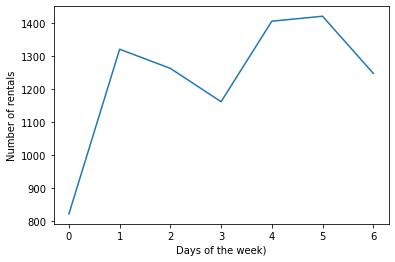

In [35]:
plt.plot(df["weekday"][8:15], df["cnt"][8:15])
plt.xlabel('Days of the week)')
plt.ylabel('Number of rentals')

In [36]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,1,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,5,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,1,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [37]:
import statistics
casmean = statistics.mean(df["casual"])
casvar = statistics.variance(df["casual"])
print(casmean,casvar)

848.1764705882352 471450.44141821115


In [38]:
regmean = statistics.mean(df["registered"])
regvar = statistics.variance(df["registered"])
print(regmean,regvar)

3656.172366621067 2434399.962029871


In [39]:
cntmean = statistics.mean(df["cnt"])
cntvar = statistics.variance(df["cnt"])
print(cntmean,cntvar)

4504.3488372093025 3752788.2082828926


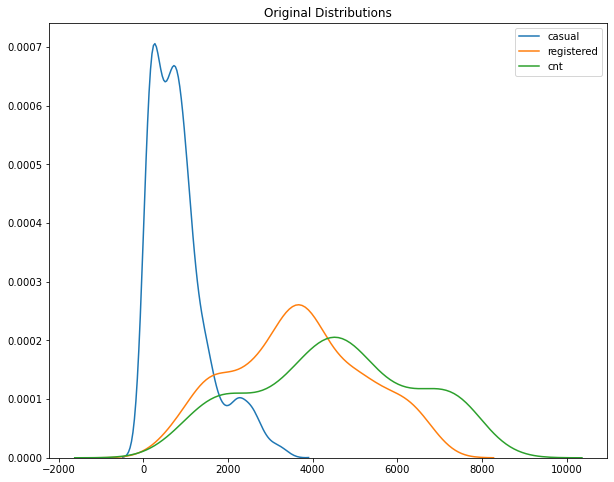

In [40]:
from sklearn import preprocessing
import seaborn as sns
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')
sns.kdeplot(df['casual'], ax=ax1)
sns.kdeplot(df['registered'], ax=ax1)
sns.kdeplot(df['cnt'], ax=ax1)

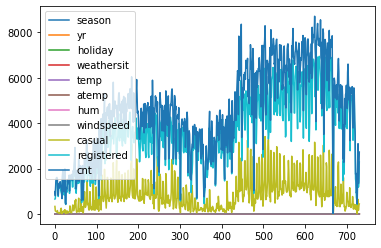

In [41]:
df.plot()

In [42]:
for col in df.columns: 
    print(col)

season
yr
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    object 
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 80.1+ KB


In [44]:
data = df.drop(['season', 'yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp' ,'hum',
'windspeed'], axis=1)

In [45]:
data

,weekday,weathersit,casual,registered,cnt
0,6,2,331,654,985
1,0,2,131,670,801
2,1,1,120,1229,1349
3,2,1,108,1454,1562
4,1,1,82,1518,1600
...,...,...,...,...,...
726,4,2,247,1867,2114
727,5,2,644,2451,3095
728,6,2,159,1182,1341
729,1,1,364,1432,1796


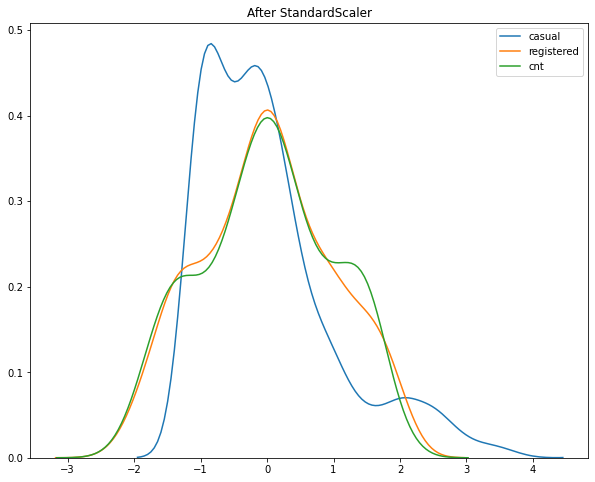

In [46]:
col_names = list(data.columns)
s_scaler = preprocessing.StandardScaler()
data_s = s_scaler.fit_transform(data)

data_s = pd.DataFrame(data_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(data_s['casual'], ax=ax1)
sns.kdeplot(data_s['registered'], ax=ax1)
sns.kdeplot(data_s['cnt'], ax=ax1)

In [47]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   weekday     731 non-null    float64
 1   weathersit  731 non-null    float64
 2   casual      731 non-null    float64
 3   registered  731 non-null    float64
 4   cnt         731 non-null    float64
dtypes: float64(5)
memory usage: 28.7 KB


In [48]:
mins = [data_s[col].min() for col in data_s.columns]
mins

[-1.4523545044798891,
 -0.7260481545646826,
 -1.2332189224979286,
 -2.3320924028222887,
 -2.3153992222786273]

In [49]:
maxs = [data_s[col].max() for col in data_s.columns]
maxs

[1.5552124722192577,
 2.9469013332331233,
 3.733605651283093,
 2.1099610405782983,
 2.174534687589904]

In [50]:
data_s.describe()

,weekday,weathersit,casual,registered,cnt
count,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02,7.310000e+02
mean,-1.345633e-16,-1.521810e-16,2.250822e-16,2.887187e-16,1.429165e-16
std,1.000685e+00,1.000685e+00,1.000685e+00,1.000685e+00,1.000685e+00
min,-1.452355e+00,-7.260482e-01,-1.233219e+00,-2.332092e+00,-2.315399e+00
25%,-9.510933e-01,-7.260482e-01,-7.763235e-01,-7.434458e-01,-6.985684e-01
50%,5.142898e-02,-7.260482e-01,-1.970064e-01,3.737606e-03,2.254842e-02
75%,1.053951e+00,1.110427e+00,3.611784e-01,7.185324e-01,7.498640e-01
max,1.555212e+00,2.946901e+00,3.733606e+00,2.109961e+00,2.174535e+00


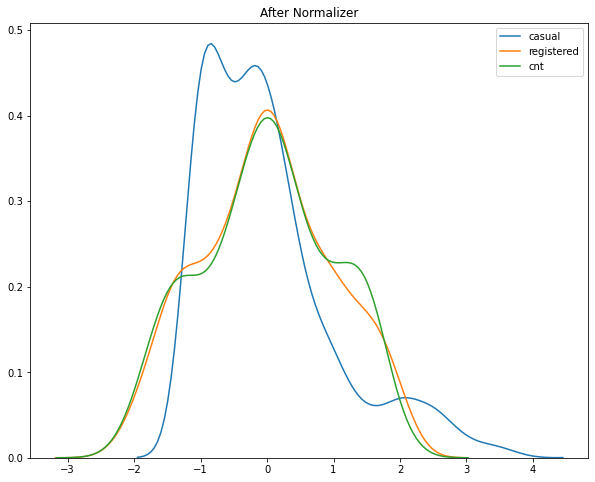

In [51]:
n_scaler = preprocessing.Normalizer()
data_n = n_scaler.fit_transform(data)

data_n = pd.DataFrame(data_n, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Normalizer')

sns.kdeplot(data_s['casual'], ax=ax1)
sns.kdeplot(data_s['registered'], ax=ax1)
sns.kdeplot(data_s['cnt'], ax=ax1)

In [52]:
newdf = data.drop(['weekday', 'weathersit'], axis = 1)

In [53]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   casual      731 non-null    int64
 1   registered  731 non-null    int64
 2   cnt         731 non-null    int64
dtypes: int64(3)
memory usage: 17.3 KB


# Normalisation

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
#cas normalised
norm_cas = preprocessing.normalize([newdf['casual']])
norm_cas_new = pd.DataFrame(norm_cas)


In [56]:
#registered normalised
norm_reg = preprocessing.normalize([newdf['registered']])
norm_reg_new = pd.DataFrame(norm_reg)

In [57]:
#count normalised
norm_cnt = preprocessing.normalize([newdf['cnt']])
norm_cnt_new = pd.DataFrame(norm_cnt)

(array([204., 144., 165.,  89.,  44.,  23.,  26.,  22.,   9.,   5.]),
 array([6.78046883e-05, 1.16217236e-02, 2.31756425e-02, 3.47295613e-02,
        4.62834802e-02, 5.78373991e-02, 6.93913180e-02, 8.09452369e-02,
        9.24991557e-02, 1.04053075e-01, 1.15606994e-01]),
 <a list of 10 Patch objects>)

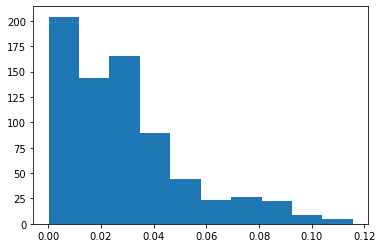

In [58]:
plt.hist(norm_cas_new)

(array([ 14.,  44.,  79.,  80., 113., 144.,  85.,  71.,  57.,  44.]),
 array([0.00018611, 0.00663097, 0.01307583, 0.01952069, 0.02596555,
        0.03241041, 0.03885528, 0.04530014, 0.051745  , 0.05818986,
        0.06463472]),
 <a list of 10 Patch objects>)

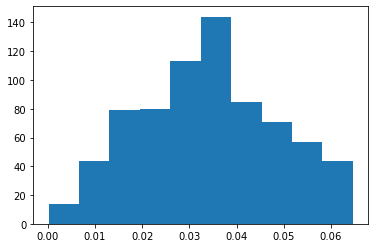

In [59]:
plt.hist(norm_reg_new)

(array([ 13.,  62.,  71.,  73., 122., 137.,  81.,  76.,  79.,  17.]),
 array([0.00016597, 0.00672323, 0.01328049, 0.01983776, 0.02639502,
        0.03295228, 0.03950955, 0.04606681, 0.05262407, 0.05918133,
        0.0657386 ]),
 <a list of 10 Patch objects>)

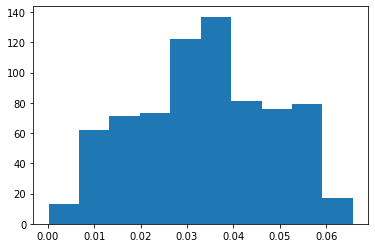

In [60]:
plt.hist(norm_cnt_new)

# Standardisation

In [61]:
#casual standardised
cas_train = newdf[["casual"]]
s_cas = scaler.fit_transform(cas_train)
print(s_cas.mean())
print(s_cas.var())

9.720146864023258e-17
1.0


In [62]:
 #registered standardised
reg_train = newdf[["registered"]]
s_reg = scaler.fit_transform(reg_train)
print(s_reg.mean())
print(s_reg.var())

7.776117491218607e-17
1.0


In [63]:
#count standardised
cnt_train = newdf[["cnt"]]
s_cnt = scaler.fit_transform(cnt_train)
print(s_cnt.mean())
print(s_cnt.var())

-1.166417623682791e-16
0.9999999999999999


# Hypothesis

In [64]:
cntdf = df["cnt"]
sample_df = cntdf[300:400]

In [66]:
cntdf.describe() 

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [67]:
sample_df.describe()

count     100.000000
mean     3129.310000
std       923.200261
min       627.000000
25%      2491.000000
50%      3326.500000
75%      3752.750000
max      4579.000000
Name: cnt, dtype: float64

In [69]:
from scipy.stats import norm
from math import sqrt
#one sided hypothesis test(for smaller than in NULL hypothesis)
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean = 3129
pop_mean = 4504
sample_size =  100
std_dev = 923

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0 : μ <= 4504
H1 : μ > 4504
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -14.897074756229687 

Failed to reject NULL hypothesis


# Correlation

In [70]:
corr = df.corr(method='pearson')
corr.head()

,season,yr,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,-0.010537,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,0.007954,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
holiday,-0.010537,0.007954,1.000000,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weathersit,0.019211,-0.048727,-0.034627,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,-0.028556,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [71]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,1,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,5,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,1,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


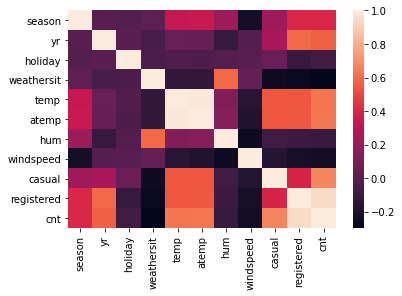

In [72]:
import seaborn as sns
sns.heatmap(corr) # this will give us a basic heat map

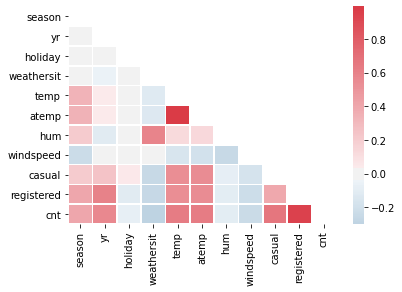

In [73]:
labels = {
    'season': 'season', 
    'year': 'year', 
    'holiday': 'holiday', 
    'weathersit': 'weathersit',
    'temperature': 'temparature',
    'atemp': 'atemp',
    'humidity': 'humidity',
    'windspees': 'windspeed',
    'casual': 'casual', 
    'registered': 'registered',
    'count': 'count'
}

corr = corr.rename(labels)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, center=0)